In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%ls

MOEAD_Weights/
NormSystem_obj_2_conf_200_10_5_0.05_10_5000_objective.csv
NormSystem_obj_2_conf_200_10_5_0.05_10_5000_variable.csv
NormSystem_obj_5_conf_200_10_5_0.05_10_5000_objective.csv
NormSystem_obj_5_conf_200_10_5_0.05_10_5000_variable.csv
PFconf_200_10_5_0.05_10_5000_2
PFconf_200_10_5_0.05_10_5000_2.Clean
PFconf_200_10_5_0.05_10_5000_2.removedDominated.file
PFconf_200_10_5_0.05_10_5000_5
PFconf_200_10_5_0.05_10_5000_5.Clean
PFconf_200_10_5_0.05_10_5000_5.removedDominated.file
README.md
Reasoning Results.ipynb
Untitled.ipynb
VAR
alldata_2obj.csv
alldata_5obj.csv
generateGraph.ipynb
generatePF.sh*
graphs/
graphs_images/
hyp_nalldata_2obj.csv
hyp_nalldata_2obj.csv01.png
hyp_nalldata_2obj.csvtestThesis.log
hyp_nalldata_5obj.csv
hyp_nalldata_5obj.csv01.png
hyp_nalldata_5obj.csvtestThesis.log
hypervolume2obj.png
hypervolume5obj.png
igd_nalldata_2obj.csv
igd_nalldata_2obj.csv01.png
igd_nalldata_2obj.csvtestThesis.log
igd_nalldata_5obj.csv
igd_nalldata_5obj.csv01.png
igd_nalldata_5obj.cs

In [61]:
qtdObj=2
df_obj = pd.read_csv('NormSystem_obj_'+str(qtdObj)+'_conf_200_10_5_0.05_10_5000_objective.csv', sep=';')
df_obj['kind'] = 'OBJAgent'
df_var = pd.read_csv('NormSystem_obj_'+str(qtdObj)+'_conf_200_10_5_0.05_10_5000_variable.csv', sep=';')
df_var['kind'] = 'VARAgent'
df_var['fitness']=df_var['fitness']*-1
df = df_obj.copy()
df = df.append(df_var)


/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_81428/771998185.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_var)


In [52]:
df_var

,Run,bestKey,bestValue,obj1,obj2,algName,problemName,fitness,kind
0,1,0.9999315374169119_1.6708942288598423E-5_0.221...,85,0.9347,-0.2000,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.5692,VARAgent
1,1,0.7543266840912057_0.7987630710984565_0.056627...,200,0.7130,-0.4000,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.4835,VARAgent
2,1,0.9223441860566972_0.03315942713999459_0.56000...,200,0.7604,-1.0000,MOEAD,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.5149,VARAgent
3,1,0.9542818030448582_1.8596153718742172E-5_0.704...,105,0.9217,-0.6000,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.8541,VARAgent
4,2,0.9827341714323542_2.375721894041339E-5_0.3062...,158,0.6916,0.2000,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.6263,VARAgent
...,...,...,...,...,...,...,...,...,...
115,29,0.9882034934064248_0.9085317877025998_0.955776...,200,0.6339,0.0000,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.6834,VARAgent
116,30,0.9999802599838185_3.3999845964999016E-6_0.387...,122,0.9290,-0.4000,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.6008,VARAgent
117,30,0.8408546995450595_0.65985970359918_0.57857583...,200,0.8821,-0.2000,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.7469,VARAgent
118,30,0.8839868762834756_0.41625115480987346_0.35241...,200,0.7516,0.0000,MOEAD,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.4681,VARAgent


In [20]:
def is_not_dominated(row, qtdObj, df_copy):
    for obj in range(1, qtdObj+1):
        if row['obj'+str(obj)] < 0:
            return False
    for i, v in df_copy.iterrows():
        if str(row['bestKey'])!=str(v['bestKey']):
            dominated=True
            obj=1
            while dominated and obj <= qtdObj:
                if row['obj'+str(obj)] > v['obj'+str(obj)]:
                    #not dominated
                    dominated=False
                    break
                obj = obj + 1
            if dominated:
                return False
    return True

In [21]:
def remove_dominated(df_org, qtdObj, algName=None):
    df = df_org
    if algName:
        df = df_org[df_org['algName']==algName]
    
    df['not_dominated']=df.apply(lambda row: is_not_dominated(row, qtdObj, df.copy()), axis=1)
    return df[df.not_dominated]


In [22]:
pd.options.display.float_format = '{:,.4f}'.format
print(remove_dominated(df_obj, qtdObj).head(1).T.style.to_latex())


\begin{tabular}{ll}
 & 36 \\
Run & 10 \\
bestKey & 0.9987716138380137_0.22150487541425415_0.01963430549887717_0.1638296304368392_0.3572349246837408_0.2576350673982353_0.3618940622213629_0.518180919566095_0.43572743557455895_0.5213044903962146_0.5868755356539365_0.632261131698091 \\
bestValue & 200 \\
obj1 & 0.927514 \\
obj2 & 0.000000 \\
algName & NSGAII \\
problemName & NormSystem_obj_2_conf_200_10_5_0.05_10_5000 \\
fitness & 0.444598 \\
kind & OBJAgent \\
not_dominated & True \\
\end{tabular}



In [23]:
remove_dominated(df_obj, qtdObj)

,Run,bestKey,bestValue,obj1,obj2,algName,problemName,fitness,kind,not_dominated
36,10,0.9987716138380137_0.22150487541425415_0.01963...,200,0.9275,0.0000,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.4446,OBJAgent,True
82,21,0.9631894056696924_0.5607377729628402_0.177990...,200,0.8984,0.2000,MOEAD,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.5492,OBJAgent,True
86,22,0.8544532149431461_0.7150284452810816_0.043675...,200,0.8887,0.8000,MOEAD,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.8435,OBJAgent,True


In [24]:
remove_dominated(df_var, qtdObj)

,Run,bestKey,bestValue,obj1,obj2,algName,problemName,fitness,kind,not_dominated
113,29,0.8344719232327884_0.4793219445447544_0.721615...,124,0.8520,0.6000,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.4883,VARAgent,True
119,30,0.9998082507982038_6.93143361025598E-4_0.09377...,200,0.9309,0.2000,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.4763,VARAgent,True


In [10]:
v=remove_dominated(df_var, qtdObj)
print(v[v['Run']==8].style.to_latex())

\begin{tabular}{lrlrrrllrlr}
 & Run & bestKey & bestValue & obj1 & obj2 & algName & problemName & fitness & kind & not_dominated \\
\end{tabular}



In [97]:
vx=v[v['Run']==8]
arr=list(vx['bestKey'])[0].split('_')
[float(f) for f in arr]

[0.9997768973236235,
 4.811005803460204e-05,
 0.2535854150029502,
 0.25251454659075245,
 0.9381922658944765,
 0.6550148438770136,
 0.6546434735664663,
 0.891774404140789,
 0.7938459459852671,
 0.7937040892895431,
 0.042590247660158835,
 0.04314355494736004]

In [18]:
remove_dominated(v,2)

/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_91275/1840599357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['not_dominated']=df.apply(lambda row: is_not_dominated(row, qtdObj, df.copy()), axis=1)


,Run,bestKey,bestValue,obj1,obj2,algName,problemName,fitness,kind,not_dominated
28,8,0.9997768973236235_4.811005803460204E-5_0.2535...,200,1.0000,0.9807,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.5848,VARAgent,True
44,12,0.9999932941852018_6.156437620854287E-5_0.6866...,200,1.0000,0.5922,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.5581,VARAgent,True
63,16,0.9999927135871584_8.42568075846063E-5_0.62306...,60,1.0000,1.0000,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.8075,VARAgent,True
103,26,0.9999989030605424_3.843070578563351E-6_0.7309...,60,1.0000,0.1868,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.6474,VARAgent,True


In [201]:
df_final = remove_dominated(df, qtdObj)

<AxesSubplot:xlabel='obj1', ylabel='obj2'>

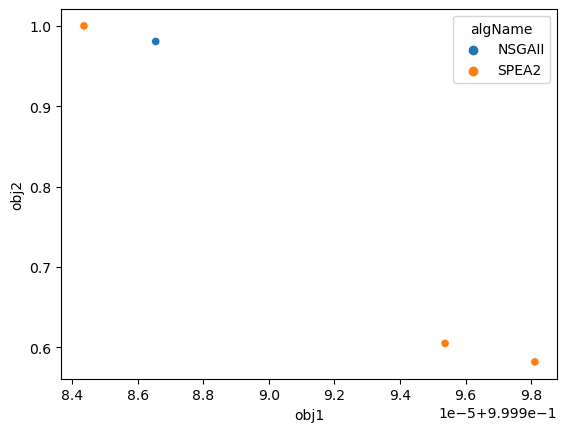

In [202]:
sns.scatterplot(data=df_final, x="obj1", y="obj2", hue="algName")

In [203]:
df_final

,Run,bestKey,bestValue,obj1,obj2,algName,problemName,fitness,kind,not_dominated
28,8,0.9997768973236235_4.811005803460204E-5_0.2535...,200,0.999987,0.980672,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.990315,OBJAgent,True
55,14,0.9999232147580307_3.3343339106568757E-6_0.320...,200,0.999998,0.581622,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.789125,OBJAgent,True
63,16,0.9999927135871584_8.42568075846063E-5_0.62306...,200,0.999984,1.000000,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.999992,OBJAgent,True
99,25,0.999971159316052_1.4937332534514593E-5_0.4211...,200,0.999995,0.604762,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.805100,OBJAgent,True
28,8,0.9997768973236235_4.811005803460204E-5_0.2535...,200,0.999987,0.980672,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.626906,VARAgent,True
63,16,0.9999927135871584_8.42568075846063E-5_0.62306...,55,0.999984,1.000000,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.754770,VARAgent,True


In [182]:
remove_dominated(df, qtdObj, 'NSGAII')

/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_35057/1840599357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['not_dominated']=df.apply(lambda row: is_not_dominated(row, qtdObj, df.copy()), axis=1)


,Run,bestKey,bestValue,obj1,obj2,algName,problemName,fitness,kind,not_dominated
0,1,0.9999315696422966_1.6708942288598423E-5_0.221...,200,0.999996,0.406800,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.709292,OBJAgent,True
28,8,0.9997768973236235_4.811005803460204E-5_0.2535...,200,0.999987,0.980672,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.990315,OBJAgent,True
40,11,0.9999919662980469_3.287760373107761E-5_0.0826...,200,0.999995,0.503922,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.742862,OBJAgent,True
72,19,0.9984718804868341_0.9877540445280251_0.932491...,200,0.997324,0.996520,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.996924,OBJAgent,True
80,21,0.9999147561573052_6.009778971807726E-6_0.5714...,200,0.999995,0.598720,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.792387,OBJAgent,True
28,8,0.9997768973236235_4.811005803460204E-5_0.2535...,200,0.999987,0.980672,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.626906,VARAgent,True
40,11,0.9999919662980469_3.287760373107761E-5_0.0826...,102,0.999995,0.503922,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.635513,VARAgent,True
72,19,0.9984718804868341_0.9877540445280251_0.932491...,200,0.997324,0.996520,NSGAII,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.643502,VARAgent,True


In [183]:
remove_dominated(df, qtdObj, 'SPEA2')

/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_35057/1840599357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['not_dominated']=df.apply(lambda row: is_not_dominated(row, qtdObj, df.copy()), axis=1)


,Run,bestKey,bestValue,obj1,obj2,algName,problemName,fitness,kind,not_dominated
55,14,0.9999232147580307_3.3343339106568757E-6_0.320...,200,0.999998,0.581622,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.789125,OBJAgent,True
63,16,0.9999927135871584_8.42568075846063E-5_0.62306...,200,0.999984,1.000000,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.999992,OBJAgent,True
99,25,0.999971159316052_1.4937332534514593E-5_0.4211...,200,0.999995,0.604762,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.805100,OBJAgent,True
63,16,0.9999927135871584_8.42568075846063E-5_0.62306...,55,0.999984,1.000000,SPEA2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.754770,VARAgent,True


In [184]:
remove_dominated(df, qtdObj, 'MOMBI2')

/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_35057/1840599357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['not_dominated']=df.apply(lambda row: is_not_dominated(row, qtdObj, df.copy()), axis=1)


,Run,bestKey,bestValue,obj1,obj2,algName,problemName,fitness,kind,not_dominated
61,16,0.9055024748757164_0.9913690715394954_0.735732...,200,0.925824,0.80560,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.865284,OBJAgent,True
69,18,0.9999770628835744_0.5968874156052466_0.761165...,200,0.907758,0.99996,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.950695,OBJAgent,True
117,30,0.8408546995450595_0.65985970359918_0.57857583...,200,0.937283,0.67864,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.807498,OBJAgent,True
61,16,0.9055024748757164_0.9913690715394954_0.735732...,200,0.925824,0.80560,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.497988,VARAgent,True
69,18,0.9999770628835744_0.5968874156052466_0.761165...,200,0.907758,0.99996,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.455396,VARAgent,True
117,30,0.8408546995450595_0.65985970359918_0.57857583...,200,0.937283,0.67864,MOMBI2,NormSystem_obj_2_conf_200_10_5_0.05_10_5000,0.713108,VARAgent,True


In [73]:
qtdObj=5
df_obj = pd.read_csv('NormSystem_obj_'+str(qtdObj)+'_conf_200_10_5_0.05_10_5000_objective.csv', sep=';')
df_obj['kind'] = 'OBJAgent'
df_var = pd.read_csv('NormSystem_obj_'+str(qtdObj)+'_conf_200_10_5_0.05_10_5000_variable.csv', sep=';')
df_var['kind'] = 'VARAgent'
df_var['fitness']=df_var['fitness']*-1
df = df_obj.copy()
df = df.append(df_var)

/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_81428/3251023146.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_var)


In [54]:
df_var

,Run,bestKey,bestValue,obj1,obj2,obj3,obj4,obj5,algName,problemName,fitness,kind
0,1,0.8823079495296339_0.08573824235606237_0.98037...,24,0.0791,-0.6000,0.4372,1.4600,0.0196,NSGAII,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9936,VARAgent
1,1,0.9846138529739865_0.8956283929988162_0.003901...,38,0.5502,-0.4000,0.2810,1.2971,0.9961,MOMBI2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.5310,VARAgent
2,1,0.829157917351188_0.40612455836542616_0.168035...,24,0.3773,-0.8000,0.3325,1.2311,0.8320,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9905,VARAgent
3,1,0.9965027132832879_0.759356888128166_0.0333936...,23,-0.2266,0.4000,0.6211,1.4185,0.9666,SPEA2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9997,VARAgent
4,2,0.9659540963076244_0.978410834953352_0.0485502...,23,0.1739,-0.8000,0.4826,0.2180,0.9514,NSGAII,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.0012,VARAgent
...,...,...,...,...,...,...,...,...,...,...,...,...
115,29,0.9951958163732899_0.5492681963448225_1.914784...,28,0.0010,-0.4000,0.5207,1.0556,0.9998,SPEA2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.0002,VARAgent
116,30,0.8650094903283384_0.11557871873426154_4.31569...,40,0.4636,-0.8000,0.3057,1.1664,1.0000,NSGAII,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.4476,VARAgent
117,30,0.8382893136182824_0.7231413869277508_0.006047...,61,0.6264,0.4000,0.3275,1.4984,0.9940,MOMBI2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.2950,VARAgent
118,30,0.9754199125806415_0.34263174374823246_0.34861...,46,0.7482,0.0000,0.2434,1.3552,0.6514,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.4570,VARAgent


In [71]:
df_obj.algName.unique()

array(['NSGAII', 'MOMBI2', 'MOEAD', 'SPEA2'], dtype=object)

In [55]:
remove_dominated(df_obj, qtdObj, 'MOEAD')

/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_81428/1840599357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['not_dominated']=df.apply(lambda row: is_not_dominated(row, qtdObj, df.copy()), axis=1)


,Run,bestKey,bestValue,obj1,obj2,obj3,obj4,obj5,algName,problemName,fitness,kind,not_dominated
2,1,0.9976780326737171_0.982335813013772_0.2819808...,97,0.5505,1.0000,0.2983,1.3429,0.7180,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.8406,OBJAgent,True
6,2,0.9107772209237105_0.7074823359534389_2.492056...,93,0.7850,0.4000,0.2566,1.0760,0.9998,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.7702,OBJAgent,True
14,4,0.9905478407323688_0.8877594223043467_0.363785...,116,0.1062,1.0000,0.4159,1.4688,0.6362,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.8460,OBJAgent,True
18,5,0.9838724395708057_0.8135213609502229_0.306400...,102,0.6655,0.8000,0.2733,1.4863,0.6936,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9451,OBJAgent,True
22,6,0.941104164383583_0.888963493375812_0.00503817...,80,0.7210,0.6000,0.2465,1.1502,0.9950,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.7593,OBJAgent,True
26,7,0.874013315689027_0.7889843275758666_2.2991872...,90,0.6888,0.6000,0.2742,1.1729,0.9998,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.8106,OBJAgent,True
30,8,0.9246126546067257_0.9655659932597984_0.004889...,125,0.7275,0.4000,0.2577,1.4885,0.9951,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9001,OBJAgent,True
34,9,0.9745503542804363_0.31980358077000204_5.16266...,137,0.8497,1.0000,0.2435,1.2993,0.9999,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9140,OBJAgent,True
42,11,0.8401284664310982_0.6460978816432406_0.003066...,147,0.5245,1.0000,0.2896,1.4955,0.9969,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9724,OBJAgent,True
46,12,0.9684692204042409_0.7173377650489161_0.017954...,120,0.2016,1.0000,0.4323,1.2657,0.9820,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.8141,OBJAgent,True


In [56]:
v=remove_dominated(df_var, qtdObj)

In [57]:
v

,Run,bestKey,bestValue,obj1,obj2,obj3,obj4,obj5,algName,problemName,fitness,kind,not_dominated
5,2,0.9056419343691101_0.34403124431224585_3.44737...,37,0.8486,0.0000,0.2399,1.2450,1.0000,MOMBI2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.5019,VARAgent,True
9,3,0.9956947482596102_0.9244637118154013_0.009311...,26,0.1340,1.0000,0.4523,1.3824,0.9907,MOMBI2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9999,VARAgent,True
14,4,0.8385501806390667_0.4831905977919023_0.001661...,23,0.5138,0.0000,0.2966,1.3093,0.9983,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9728,VARAgent,True
18,5,0.9094265737705901_0.43587867030755567_0.78282...,24,0.2314,0.0000,0.4106,1.3787,0.2172,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9449,VARAgent,True
25,7,0.7239885993394348_0.9737174738842542_0.002689...,23,0.2972,0.0000,0.3442,1.0638,0.9973,MOMBI2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.1752,VARAgent,True
36,10,0.9270239455877265_0.025334806935914722_0.0711...,24,0.5176,0.2000,0.3417,0.9937,0.9289,NSGAII,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.6762,VARAgent,True
37,10,0.9782505708628206_0.3726988901743594_0.001148...,26,0.2729,0.2000,0.3839,0.3933,0.9989,MOMBI2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.0245,VARAgent,True
41,11,0.9567774272459804_0.15206175538848637_2.80413...,25,0.7626,0.0000,0.2516,1.4986,1.0000,MOMBI2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.9991,VARAgent,True
49,13,0.9261310559493058_0.9400679529775402_3.266835...,39,0.5144,0.0000,0.3393,1.2942,1.0000,MOMBI2,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.5382,VARAgent,True
50,13,0.8887162070186866_0.5275479500161665_0.001312...,49,0.1116,1.0000,0.3936,1.4248,0.9987,MOEAD,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.5276,VARAgent,True


In [74]:
v=remove_dominated(df_var, qtdObj).sort_values('fitness', ascending=False)
#vx=v[(v.Run==15) | (v.Run==23)]
v=v[(v.obj1 > 0.9)]
vx=v[(v.Run==3)]

In [75]:
vx

,Run,bestKey,bestValue,obj1,obj2,obj3,obj4,obj5,algName,problemName,fitness,kind,not_dominated
8,3,0.9714736648819036_0.024096924331781587_0.1669...,22,0.9991,0.9217,0.2002,0.6903,0.8331,NSGAII,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.6611,VARAgent,True


In [77]:
print(vx.style.to_latex())

\begin{tabular}{lrlrrrrrrllrlr}
 & Run & bestKey & bestValue & obj1 & obj2 & obj3 & obj4 & obj5 & algName & problemName & fitness & kind & not_dominated \\
8 & 3 & 0.9714736648819036_0.024096924331781587_0.1669003878031924_0.778442133624948_0.011936957979744766_0.717622515387405_0.9406545760542059_0.6610691154542887_0.9188151589130293_0.999208581635559_0.019807974177544232_0.15475715963429892 & 22 & 0.999121 & 0.921739 & 0.200233 & 0.690288 & 0.833100 & NSGAII & NormSystem_obj_5_conf_200_10_5_0.05_10_5000 & 0.661069 & VARAgent & True \\
\end{tabular}



In [78]:
vx

,Run,bestKey,bestValue,obj1,obj2,obj3,obj4,obj5,algName,problemName,fitness,kind,not_dominated
8,3,0.9714736648819036_0.024096924331781587_0.1669...,22,0.9991,0.9217,0.2002,0.6903,0.8331,NSGAII,NormSystem_obj_5_conf_200_10_5_0.05_10_5000,0.6611,VARAgent,True


In [82]:
str(vx['bestKey'][1]).split("_")

KeyError: 1

[0.9714736648819036,
 0.024096924331781587,
 0.1669003878031924,
 0.778442133624948,
 0.011936957979744766,
 0.717622515387405,
 0.9406545760542059,
 0.6610691154542887,
 0.9188151589130293,
 0.999208581635559,
 0.019807974177544232,
 0.15475715963429892]

In [236]:
df_final = pd.read_csv('veryFinalResults.csv')

In [237]:
df_final

,Run,Catche,FineRate,CollectingRate1,CollectingRate2,CollectingRate3,CollectingRate4,CollectingRate5,RedistributionRate1,RedistributionRate2,...,RedistributionRate4,RedistributionRate5,Agents,Equality,Fairness,Wealth,GainedAmount,CollectPortion,algName,fitness
0,28,0.9998,0.0000,0.2536,0.2525,0.9382,0.6550,0.6546,0.8918,0.7938,...,0.0426,0.0431,200,1.0000,0.9807,,,,NSGAII,0.5848
1,8,0.9715,0.0241,0.1669,0.7784,0.0119,0.7176,0.9407,0.6611,0.9188,...,0.0198,0.1548,22,0.9991,0.9217,0.200233,0.690288,0.833100,NSGAII,0.6611


In [238]:
df_final.columns

Index([' Run ', 'Catche', 'FineRate', 'CollectingRate1', 'CollectingRate2',
       'CollectingRate3', 'CollectingRate4', 'CollectingRate5',
       'RedistributionRate1', 'RedistributionRate2', 'RedistributionRate3',
       'RedistributionRate4', 'RedistributionRate5', 'Agents', ' Equality ',
       'Fairness', 'Wealth', 'GainedAmount', 'CollectPortion', ' algName ',
       ' fitness '],
      dtype='object')

In [239]:
to_multiply=['Catche', 'FineRate','CollectingRate1', 'CollectingRate2',
       'CollectingRate3', 'CollectingRate4', 'CollectingRate5',
       'RedistributionRate1', 'RedistributionRate2', 'RedistributionRate3',
       'RedistributionRate4', 'RedistributionRate5']

In [240]:
for t in to_multiply:
    df_final[t]=df_final[t].apply(lambda x : float(x) * 100)

In [241]:
df_final

,Run,Catche,FineRate,CollectingRate1,CollectingRate2,CollectingRate3,CollectingRate4,CollectingRate5,RedistributionRate1,RedistributionRate2,...,RedistributionRate4,RedistributionRate5,Agents,Equality,Fairness,Wealth,GainedAmount,CollectPortion,algName,fitness
0,28,99.9777,0.0048,25.3585,25.2515,93.8192,65.5015,65.4643,89.1774,79.3846,...,4.2590,4.3144,200,1.0000,0.9807,,,,NSGAII,0.5848
1,8,97.1474,2.4097,16.6900,77.8442,1.1937,71.7623,94.0655,66.1069,91.8815,...,1.9808,15.4757,22,0.9991,0.9217,0.200233,0.690288,0.833100,NSGAII,0.6611


In [191]:
pd.options.display.float_format = '{:,.4f}'.format
df_final.to_csv('prepare_to_latex.csv')

In [192]:
print(df_final.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrllllrll}
\toprule
{} &   Run  &  Catche &  FineRate &  CollectingRate1 &  CollectingRate2 &  CollectingRate3 &  CollectingRate4 &  CollectingRate5 &  RedistributionRate1 &  RedistributionRate2 &  RedistributionRate3 &  RedistributionRate4 &  RedistributionRate5 &  Agents &   Equality  &  Fairness &      Wealth & GainedAmount & CollectPortion &  algName  &   fitness  &                               collecting &                           redistributing \\
\midrule
0 &     28 & 99.9777 &    0.0048 &          25.3585 &          25.2515 &          93.8192 &          65.5015 &          65.4643 &              89.1774 &              79.3846 &              79.3704 &               4.2590 &               4.3144 &     200 &      1.0000 &    0.9807 &             &              &                &   NSGAII  &     0.5848 &  [16.69\%, 77.84\%, 1.19\%, 71.76\%, 94.07\%] &  [66.11\%, 91.88\%, 99.92\%, 1.98\%, 15.48\%] \\
1 &      8 & 97.1474 &    2.4097 &          16.6900

/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_91275/3655016761.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_final.to_latex())


In [193]:
df_final

,Run,Catche,FineRate,CollectingRate1,CollectingRate2,CollectingRate3,CollectingRate4,CollectingRate5,RedistributionRate1,RedistributionRate2,...,Agents,Equality,Fairness,Wealth,GainedAmount,CollectPortion,algName,fitness,collecting,redistributing
0,28,99.9777,0.0048,25.3585,25.2515,93.8192,65.5015,65.4643,89.1774,79.3846,...,200,1.0000,0.9807,,,,NSGAII,0.5848,"[16.69%, 77.84%, 1.19%, 71.76%, 94.07%]","[66.11%, 91.88%, 99.92%, 1.98%, 15.48%]"
1,8,97.1474,2.4097,16.6900,77.8442,1.1937,71.7623,94.0655,66.1069,91.8815,...,22,0.9991,0.9217,0.200233,0.690288,0.833100,NSGAII,0.6611,"[16.69%, 77.84%, 1.19%, 71.76%, 94.07%]","[66.11%, 91.88%, 99.92%, 1.98%, 15.48%]"


In [194]:
cr=['CollectingRate1', 'CollectingRate2',
       'CollectingRate3', 'CollectingRate4', 'CollectingRate5']

In [195]:
df_final[cr].apply(lambda r: ''.join(str(r)), axis=1)

0    CollectingRate1   25.3585\nCollectingRate2   2...
1    CollectingRate1   16.6900\nCollectingRate2   7...
dtype: object

In [196]:
df_final[cr]

,CollectingRate1,CollectingRate2,CollectingRate3,CollectingRate4,CollectingRate5
0,25.3585,25.2515,93.8192,65.5015,65.4643
1,16.6900,77.8442,1.1937,71.7623,94.0655


In [197]:
d=df_final


In [199]:
d

,Run,Catche,FineRate,CollectingRate1,CollectingRate2,CollectingRate3,CollectingRate4,CollectingRate5,RedistributionRate1,RedistributionRate2,...,Agents,Equality,Fairness,Wealth,GainedAmount,CollectPortion,algName,fitness,collecting,redistributing
0,28,99.9777,0.0048,25.3585,25.2515,93.8192,65.5015,65.4643,89.1774,79.3846,...,200,1.0000,0.9807,,,,NSGAII,0.5848,"[16.69%, 77.84%, 1.19%, 71.76%, 94.07%]","[66.11%, 91.88%, 99.92%, 1.98%, 15.48%]"
1,8,97.1474,2.4097,16.6900,77.8442,1.1937,71.7623,94.0655,66.1069,91.8815,...,22,0.9991,0.9217,0.200233,0.690288,0.833100,NSGAII,0.6611,"[16.69%, 77.84%, 1.19%, 71.76%, 94.07%]","[66.11%, 91.88%, 99.92%, 1.98%, 15.48%]"


In [200]:
d

,Run,Catche,FineRate,CollectingRate1,CollectingRate2,CollectingRate3,CollectingRate4,CollectingRate5,RedistributionRate1,RedistributionRate2,...,Agents,Equality,Fairness,Wealth,GainedAmount,CollectPortion,algName,fitness,collecting,redistributing
0,28,99.9777,0.0048,25.3585,25.2515,93.8192,65.5015,65.4643,89.1774,79.3846,...,200,1.0000,0.9807,,,,NSGAII,0.5848,"[16.69%, 77.84%, 1.19%, 71.76%, 94.07%]","[66.11%, 91.88%, 99.92%, 1.98%, 15.48%]"
1,8,97.1474,2.4097,16.6900,77.8442,1.1937,71.7623,94.0655,66.1069,91.8815,...,22,0.9991,0.9217,0.200233,0.690288,0.833100,NSGAII,0.6611,"[16.69%, 77.84%, 1.19%, 71.76%, 94.07%]","[66.11%, 91.88%, 99.92%, 1.98%, 15.48%]"


In [202]:
d.head(1)

,Run,Catche,FineRate,CollectingRate1,CollectingRate2,CollectingRate3,CollectingRate4,CollectingRate5,RedistributionRate1,RedistributionRate2,...,Agents,Equality,Fairness,Wealth,GainedAmount,CollectPortion,algName,fitness,collecting,redistributing
0,28,99.9777,0.0048,25.3585,25.2515,93.8192,65.5015,65.4643,89.1774,79.3846,...,200,1.0000,0.9807,,,,NSGAII,0.5848,"[16.69%, 77.84%, 1.19%, 71.76%, 94.07%]","[66.11%, 91.88%, 99.92%, 1.98%, 15.48%]"


In [69]:
def float_try(str):
    try:
        v=float(str)
    except ValueError:
        v=0
    return v

def create_dc(d):
    dc={}
    varsd=[float(v)*100 for v in d.bestKey.split('_')]
    d['Catche']=varsd[0]
    d['FineRate']=varsd[1]
    d['CollectingRate1']=varsd[2]
    d['CollectingRate2']=varsd[3]
    d['CollectingRate3']=varsd[4]
    d['CollectingRate4']=varsd[5]
    d['CollectingRate5']=varsd[6]
    d['RedistributionRate1']=varsd[7]
    d['RedistributionRate2']=varsd[8]
    d['RedistributionRate3']=varsd[9]
    d['RedistributionRate4']=varsd[10]
    d['RedistributionRate5']=varsd[11]
    d['Fairness']=d['obj2']
    d['Equality']=d['obj1']
    d['Wealth']=d.get('obj3', 0)
    d['GainedAmount']=d.get('obj4', 0)
    d['CollectPortion']=d.get('obj5', 0)
    
    
    #d.CollectingRate5=d.RedistributionRate2
    #d.CollectingRate4=d.RedistributionRate1
    d['collecting']="["+"{:.{}f}".format(d['CollectingRate1'],2)+"%, "+"{:.{}f}".format(d['CollectingRate2'],2)+"%, "+"{:.{}f}".format(d.CollectingRate3,2)+"%, "+"{:.{}f}".format(d.CollectingRate4,2)+"%, "+"{:.{}f}".format(d.CollectingRate5,2)+"%]"
    d['redistributing']="["+"{:.{}f}".format(d.RedistributionRate1,2)+"%, "+"{:.{}f}".format(d.RedistributionRate2,2)+"%, "+"{:.{}f}".format(d.RedistributionRate3,2)+"%, "+"{:.{}f}".format(d.RedistributionRate4,2)+"%, "+"{:.{}f}".format(d.RedistributionRate5,2)+"%]"
    dc['collect']=str(d['collecting'])
    dc['redistribute']=str(d['redistributing'])
    dc['fine']=str("{:.{}f}".format(d['FineRate'],4))+"%"
    dc['catch']=str("{:.{}f}".format(d['Catche'],2))+"%"
    dc['Fairness']="{:.{}f}".format(d['Fairness'], 2)+"%"
    dc['Equality']="{:.{}f}".format(float_try(d['Equality']), 2)+"%"
    dc['Wealth']="{:.{}f}".format(float_try(d['Wealth']), 2)+"%"
    dc['GainedAmount']="{:.{}f}".format(float_try(d['GainedAmount']), 2)+"%"
    dc['CollectPortion']="{:.{}f}".format(float_try(d['CollectPortion']), 2)+"%"
    dc['Alg']=d['algName']
    return dc

In [70]:
def generateList(df):
    df_final=remove_dominated(df, qtdObj)
    lodcs=[]
    for d in df_final.iterrows():
        d=d[1]
        lodcs.append(create_dc(d))
    return lodcs

In [71]:
generateList(df_var)

[{'collect': '[1.96%, 16.38%, 35.72%, 25.76%, 36.19%]',
  'redistribute': '[51.82%, 43.57%, 52.13%, 58.69%, 63.23%]',
  'fine': '22.1505%',
  'catch': '99.88%',
  'Fairness': '0.00%',
  'Equality': '0.93%',
  'Wealth': '0.00%',
  'GainedAmount': '0.00%',
  'CollectPortion': '0.00%',
  'Alg': 'NSGAII'},
 {'collect': '[13.95%, 80.87%, 52.63%, 43.86%, 68.40%]',
  'redistribute': '[58.04%, 54.83%, 63.82%, 67.57%, 70.35%]',
  'fine': '0.0001%',
  'catch': '100.00%',
  'Fairness': '0.20%',
  'Equality': '0.89%',
  'Wealth': '0.00%',
  'GainedAmount': '0.00%',
  'CollectPortion': '0.00%',
  'Alg': 'NSGAII'},
 {'collect': '[78.45%, 51.92%, 60.63%, 56.13%, 63.15%]',
  'redistribute': '[52.75%, 69.74%, 47.87%, 51.03%, 54.30%]',
  'fine': '47.5155%',
  'catch': '91.72%',
  'Fairness': '0.80%',
  'Equality': '0.86%',
  'Wealth': '0.00%',
  'GainedAmount': '0.00%',
  'CollectPortion': '0.00%',
  'Alg': 'MOMBI2'}]

In [72]:
generateList(df_obj)

[{'collect': '[1.96%, 16.38%, 35.72%, 25.76%, 36.19%]',
  'redistribute': '[51.82%, 43.57%, 52.13%, 58.69%, 63.23%]',
  'fine': '22.1505%',
  'catch': '99.88%',
  'Fairness': '0.20%',
  'Equality': '0.93%',
  'Wealth': '0.00%',
  'GainedAmount': '0.00%',
  'CollectPortion': '0.00%',
  'Alg': 'NSGAII'},
 {'collect': '[4.37%, 37.33%, 18.76%, 32.11%, 53.04%]',
  'redistribute': '[40.95%, 50.18%, 62.82%, 48.10%, 68.36%]',
  'fine': '71.5028%',
  'catch': '85.45%',
  'Fairness': '0.60%',
  'Equality': '0.89%',
  'Wealth': '0.00%',
  'GainedAmount': '0.00%',
  'CollectPortion': '0.00%',
  'Alg': 'MOEAD'},
 {'collect': '[78.45%, 51.92%, 60.63%, 56.13%, 63.15%]',
  'redistribute': '[52.75%, 69.74%, 47.87%, 51.03%, 54.30%]',
  'fine': '47.5155%',
  'catch': '91.72%',
  'Fairness': '0.80%',
  'Equality': '0.86%',
  'Wealth': '0.00%',
  'GainedAmount': '0.00%',
  'CollectPortion': '0.00%',
  'Alg': 'MOMBI2'}]

In [74]:
generateList(df_var)

[{'collect': '[0.00%, 0.03%, 30.07%, 91.07%, 0.02%]',
  'redistribute': '[60.70%, 98.88%, 97.63%, 97.71%, 54.35%]',
  'fine': '34.4031%',
  'catch': '90.56%',
  'Fairness': '0.00%',
  'Equality': '0.85%',
  'Wealth': '0.24%',
  'GainedAmount': '1.24%',
  'CollectPortion': '1.00%',
  'Alg': 'MOMBI2'},
 {'collect': '[0.93%, 98.63%, 9.89%, 5.49%, 81.11%]',
  'redistribute': '[7.57%, 99.99%, 0.17%, 93.78%, 25.02%]',
  'fine': '92.4464%',
  'catch': '99.57%',
  'Fairness': '1.00%',
  'Equality': '0.13%',
  'Wealth': '0.45%',
  'GainedAmount': '1.38%',
  'CollectPortion': '0.99%',
  'Alg': 'MOMBI2'},
 {'collect': '[0.17%, 75.38%, 45.91%, 22.10%, 87.62%]',
  'redistribute': '[87.30%, 8.08%, 59.86%, 37.24%, 97.28%]',
  'fine': '48.3191%',
  'catch': '83.86%',
  'Fairness': '0.00%',
  'Equality': '0.51%',
  'Wealth': '0.30%',
  'GainedAmount': '1.31%',
  'CollectPortion': '1.00%',
  'Alg': 'MOEAD'},
 {'collect': '[78.28%, 84.06%, 13.46%, 32.15%, 45.44%]',
  'redistribute': '[99.24%, 16.57%, 2.8

In [75]:
generateList(df_obj)

[{'collect': '[1.17%, 0.25%, 15.09%, 90.42%, 0.02%]',
  'redistribute': '[30.44%, 74.15%, 94.18%, 65.55%, 18.42%]',
  'fine': '77.9387%',
  'catch': '99.96%',
  'Fairness': '0.60%',
  'Equality': '0.69%',
  'Wealth': '0.29%',
  'GainedAmount': '1.11%',
  'CollectPortion': '0.99%',
  'Alg': 'MOMBI2'},
 {'collect': '[28.20%, 57.92%, 71.04%, 27.09%, 83.82%]',
  'redistribute': '[30.99%, 96.59%, 31.10%, 87.98%, 76.68%]',
  'fine': '98.2336%',
  'catch': '99.77%',
  'Fairness': '1.00%',
  'Equality': '0.55%',
  'Wealth': '0.30%',
  'GainedAmount': '1.34%',
  'CollectPortion': '0.72%',
  'Alg': 'MOEAD'},
 {'collect': '[0.18%, 0.65%, 15.43%, 92.10%, 0.17%]',
  'redistribute': '[13.82%, 31.61%, 92.78%, 30.66%, 96.12%]',
  'fine': '63.2639%',
  'catch': '97.88%',
  'Fairness': '1.00%',
  'Equality': '0.20%',
  'Wealth': '0.48%',
  'GainedAmount': '1.32%',
  'CollectPortion': '1.00%',
  'Alg': 'MOMBI2'},
 {'collect': '[0.02%, 7.08%, 34.41%, 23.96%, 58.26%]',
  'redistribute': '[35.82%, 76.22%, 5

In [68]:
print(d)

Run                                                                   29
bestKey                0.9172498301757469_0.4751553357172531_0.784450...
bestValue                                                            200
obj1                                                              0.8606
obj2                                                              0.8000
algName                                                           MOMBI2
problemName                  NormSystem_obj_2_conf_200_10_5_0.05_10_5000
fitness                                                           0.5897
kind                                                            VARAgent
not_dominated                                                       True
Catche                                                           91.7250
FineRate                                                         47.5155
CollectingRate1                                                  78.4450
CollectingRate2                                    

In [78]:
v=remove_dominated(df_var, qtdObj)

In [87]:
to_paper=v[(v['obj2'] > 0.2) & (v['obj1'] > 0.71)]

In [81]:
v.columns

Index(['Run', 'bestKey', 'bestValue', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5',
       'algName', 'problemName', 'fitness', 'kind', 'not_dominated'],
      dtype='object')

In [89]:
generateList(to_paper)

/var/folders/gm/mf9q_3212qq760gs60q5yl6c0000gn/T/ipykernel_81428/1840599357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['not_dominated']=df.apply(lambda row: is_not_dominated(row, qtdObj, df.copy()), axis=1)


[{'collect': '[70.54%, 12.35%, 27.00%, 44.45%, 37.08%]',
  'redistribute': '[99.79%, 18.99%, 89.39%, 77.21%, 86.50%]',
  'fine': '84.3634%',
  'catch': '96.05%',
  'Fairness': '0.80%',
  'Equality': '0.76%',
  'Wealth': '0.24%',
  'GainedAmount': '1.05%',
  'CollectPortion': '0.29%',
  'Alg': 'NSGAII'}]